In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,9)

In [3]:
histories_path = "../histories/"

In [4]:
!cat ../histories/largeRAM/config_lRAM_TSA_0_CNN_valAcc0.712_124853_20200320 #FastText
# !cat ../histories/largeRAM/config_lRAM_TSA_0_CNN_valAcc0.706_133149_20200320 #GloVe

# !cat ../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320 #FastText
# !cat ../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.706_132245_20200320 #GloVe

# !cat ../histories/largeRAM/config_lRAM_TSA_0_BiLSTM_valAcc0.714_134843_20200320 #GloVe


[Misc]
RANDOM_SEED         = 7

[Paths]
DATA_PATH           = ../data/optimism-twitter-data/tweets_annotation.csv
#EMBEDDINGS_PATH     = ../embeddings/glove.840B.300d/glove.840B.300d.txt
EMBEDDINGS_PATH     = ../embeddings/crawl-300d-2M-subword/crawl-300d-2M-subword.vec
HISTORY_PATH        = ./histories/largeRAM
LOGGING_PATH        =
#LOGGING_PATH        = ./logging/first_log
MODELS_PATH         = ./models/largeRAM
SENTIMENT_PATH      = ../data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv

[Training]
BATCH_SIZE          = 4096 
MODEL_NAME          = CNN_model
NUM_EPOCHS          = 15
SETTING_1M1         = False

[Sentiment]
PRE_TRAINING_ON_TSA = True
SENTIMENT_LABEL     = Sentiment
SENTIMENT_TEXT      = SentimentText


In [5]:
# h_fn = "largeRAM/history_lRAM_TSA_0_CNN_valAcc0.706_133149_20200320.csv"
h_fn_bil_gl = "../histories/largeRAM/history_lRAM_TSA_0_BiLSTM_valAcc0.714_134843_20200320.csv"

h_fn_cnn_gl = "../histories/largeRAM/history_lRAM_TSA_0_CNN_valAcc0.706_133149_20200320.csv"
h_fn_cnn_ft = "../histories/largeRAM/history_lRAM_TSA_0_CNN_valAcc0.712_124853_20200320.csv"

h_fn_gru_gl = "../histories/largeRAM/history_lRAM_TSA_0_GRUStack_valAcc0.706_132245_20200320.csv"
h_fn_gru_ft = "../histories/largeRAM/history_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320.csv"

In [6]:
hist_df_bil_gl = pd.read_csv(h_fn_bil_gl)
# hist_df_bil_ft = pd.read_csv(h_fn_bil_ft)

hist_df_cnn_gl = pd.read_csv(h_fn_cnn_gl)
hist_df_cnn_ft = pd.read_csv(h_fn_cnn_ft)

hist_df_gru_gl = pd.read_csv(h_fn_gru_gl)
hist_df_gru_ft = pd.read_csv(h_fn_gru_ft)
# hist_df.head()

No handles with labels found to put in legend.


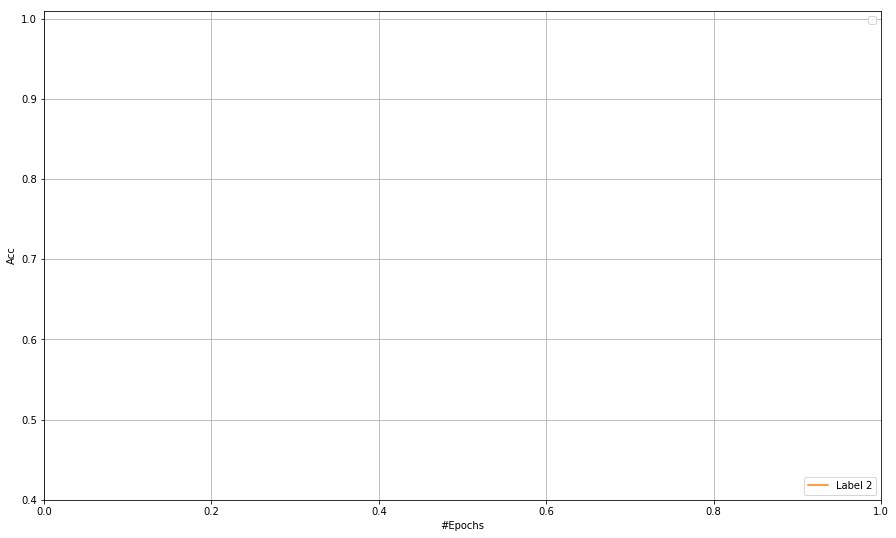

In [21]:

l1 = plt.legend([p1[0]], ["Label 1"], loc=3)
l2 = plt.legend([p2[0]], ["Label 2"], loc=4)
# plt.gca().add_artist(l1)
plt.gca().add_artist(l2)

plt.ylabel("Acc")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.4, ymax = 1.01)
plt.legend()
plt.show()

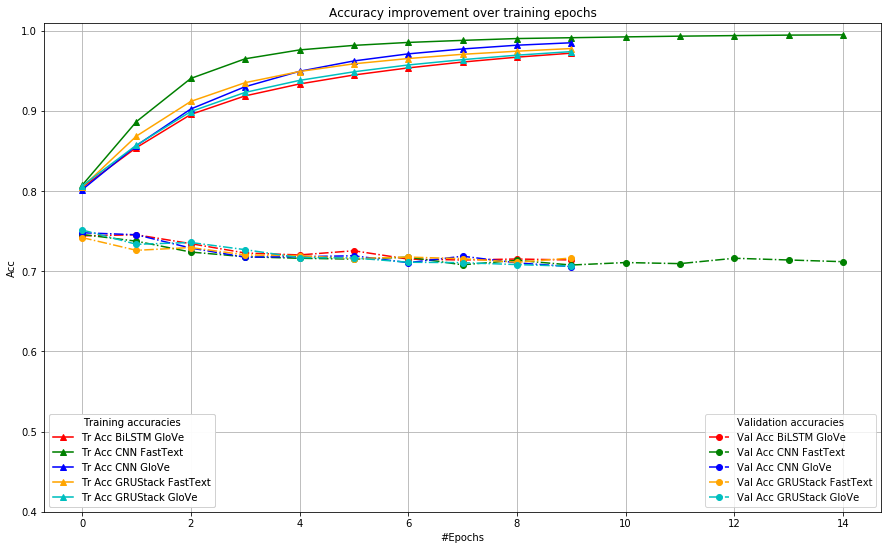

In [42]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]

plt.title("Accuracy improvement over training epochs")

lc = ['r', 'g', 'b', 'orange', 'c', 'm', 'y', 'k']#[::-1]#line_colors
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

plt_vl_bil_gl, = plt.plot(hist_df_bil_gl["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_cnn_ft, = plt.plot(hist_df_cnn_ft["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[1])
plt_vl_cnn_gl, = plt.plot(hist_df_cnn_gl["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[2])
plt_vl_gru_ft, = plt.plot(hist_df_gru_ft["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[3])
plt_vl_gru_gl, = plt.plot(hist_df_gru_gl["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[4])
val_plots  = [plt_vl_bil_gl, plt_vl_cnn_ft, plt_vl_cnn_gl\
              , plt_vl_gru_ft, plt_vl_gru_gl]
val_labels = ["Val Acc BiLSTM GloVe", "Val Acc CNN FastText", "Val Acc CNN GloVe"\
              , "Val Acc GRUStack FastText", "Val Acc GRUStack GloVe"]
val_legend = plt.legend(val_plots, val_labels, loc=4, title="Validation accuracies")


plt_tr_bil_gl, = plt.plot(hist_df_bil_gl["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
plt_tr_cnn_ft, = plt.plot(hist_df_cnn_ft["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[1])
plt_tr_cnn_gl, = plt.plot(hist_df_cnn_gl["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
plt_tr_gru_ft, = plt.plot(hist_df_gru_ft["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[3])
plt_tr_gru_gl, = plt.plot(hist_df_gru_gl["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[4])
tr_plots  = [plt_tr_bil_gl, plt_tr_cnn_ft, plt_tr_cnn_gl\
                 , plt_tr_gru_ft, plt_tr_gru_gl]
tr_labels = ["Tr Acc BiLSTM GloVe", "Tr Acc CNN FastText", "Tr Acc CNN GloVe"\
             , "Tr Acc GRUStack FastText", "Tr Acc GRUStack GloVe"]
tr_legend = plt.legend(tr_plots, tr_labels, loc=3, title="Training accuracies")





plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.4, ymax = 1.01)
# plt.legend()
plt.show()

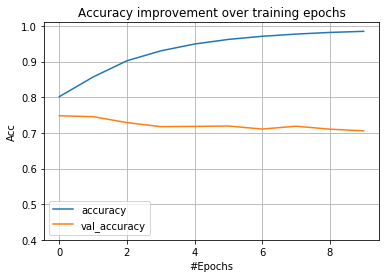

In [22]:
#GloVe 800d:
#config_lRAM_TSA_0_CNN_valAcc0.706_133149_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]

plt.title("Accuracy improvement over training epochs")
plt.plot(hist_df["accuracy"])
# plt.plot(training_errors, label="Training Acc")
# plt.plot(validation_errors, label = "Validation Acc" )
plt.plot(hist_df["val_accuracy"])
plt.ylabel("Acc")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.4, ymax = 1.01)
plt.legend()
plt.show()

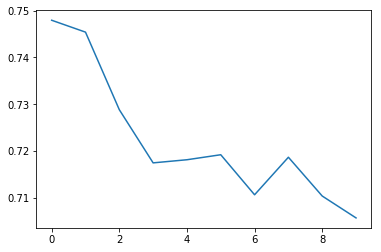

In [19]:
plt.plot(hist_df["val_accuracy"])

In [17]:
sns.lineplot(x="val_accuracy", data=hist_df)

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).